In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  # To find local version of the library


from utils.utils import *
from credentials.blob_credentials import facts_sas_token, facts_container, workspace_sas_token, workspace_container
from azure.storage.blob import ContainerClient, BlobClient
import pandas as pd
import numpy as np
import cv2

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime, date

IMAGE_DIR  = os.path.join(ROOT_DIR, "eleven_images")

Using TensorFlow backend.


In [2]:
records = fetch_train_set()
# Distribution by construction site
records.construction_site.value_counts()

Analytic2                         2155
Analytic                           999
Marseille_01                       779
Devisubox2_06                      294
Nouveau_campus_03                  260
Roissy_02                          152
BioSAV_BIofiltration_18mois_05      97
Name: construction_site, dtype: int64

In [3]:
records = records[records.construction_site == "Analytic2"]

# HEATMAP

<font color='red'> You must upload revised poly_json files to IMAGE_DIR first.</font> </br>
<font color='red'> The file name format is {sample_id}_poly.json</font> </br>
This part of pipeline is not automated since the revised polygon files were distributed via direct file transfer

In [4]:
d1 = datetime(2020, 8, 7)

In [5]:
records["first_day"] = records["date_time"].apply(lambda x: x < d1)

In [6]:
records.first_day.value_counts()

True     1083
False    1072
Name: first_day, dtype: int64

(1024, 1280, 3)


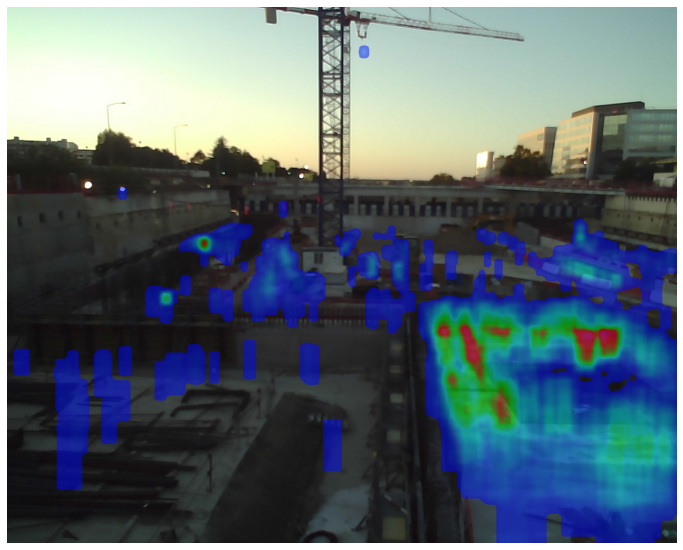

In [7]:
render_heatmap(records[records.first_day], IMAGE_DIR)

(1024, 1280, 3)


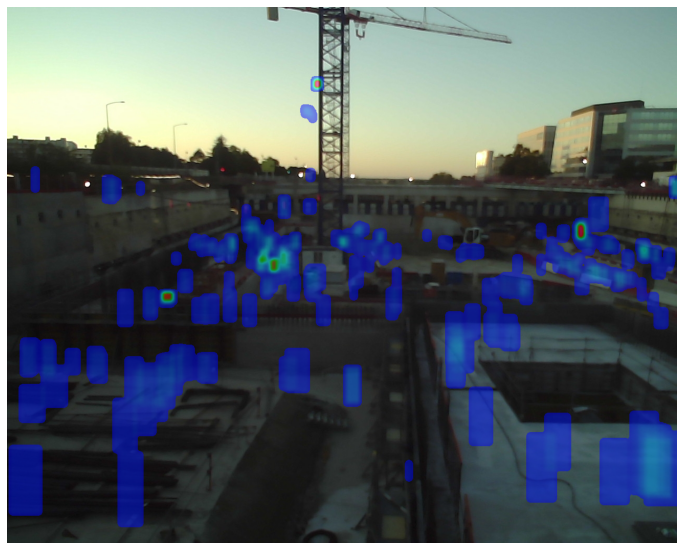

In [8]:
render_heatmap(records[records.first_day == False], IMAGE_DIR)